Steps :
1. import libraries
2. load dataset
3. explore dataframe
4. convert 'totalcharges' to numeric and handle missing values(fillna(median())
5. drop nan values - dropna
6. drop duplicates
7. check unique values in categorical column - payment method
8. perform feature engg and create tenuregroup feature using pd.cut() and display tenure, totalcharges, tenuregroup
9. visualizations :

    a. boxplot(tenuregroup,monthlycharges)

    b. countplot (payment methods)

    c. pairplot(data)

    d. countplot(tenuregroup)

    e. boxplot(monthlycharges)

10. Initialize MinMaxScaler and standard scaler, apply on monthlycharges and tenure respectively.
11. select x=df.drop(['Churn'],axis=1) , y=df['churn'] and apply train_test_split
12. check shape of test and train samples
13. save the cleaned dataframe in csv - using to_csv function

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
data = pd.read_csv("telecom_customer_churn.csv")

In [3]:
print("Data Index:", data.index)
print("Columns in dataset:", data.columns)
data.info()
print("Shape of dataset:", data.shape)
print("First 5 rows:\n", data.head())
print("Last 5 rows:\n", data.tail())

Data Index: RangeIndex(start=0, stop=7043, step=1)
Columns in dataset: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines

Filling missing values and converting to correct dtype

In [4]:
# 3. Handle missing values in the dataset, deciding on an appropriate strategy
# Convert 'TotalCharges' to numeric and fill missing values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)
print("Missing values after filling TotalCharges:\n", data.isnull().sum())

Missing values after filling TotalCharges:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


<ipython-input-4-6b00e099d49d>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


In [5]:
# Drop rows with any remaining missing values (if any)
data.dropna(inplace=True)

In [6]:
# 4. Remove any duplicate records from the dataset
print("Number of rows before removing duplicates:", len(data))
data = data.drop_duplicates()
print("Number of rows after removing duplicates:", len(data))

Number of rows before removing duplicates: 7043
Number of rows after removing duplicates: 7043


In [7]:
# 5. Check for inconsistent data and standardize it
# For example, check unique values in 'PaymentMethod' and other categorical columns
print("Unique Payment Methods:", data['PaymentMethod'].unique())
# Add further code here if standardization is needed, e.g., lowercasing or replacing variations

Unique Payment Methods: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [8]:
# 6. Perform feature engineering
# Create tenure group labels for segmentation
bins = [0, 12, 24, 36, 48, 60, np.inf]
labels = ['0-12 months', '12-24 months', '24-36 months', '36-48 months', '48-60 months', '60+ months']
data['tenuregroup'] = pd.cut(data['tenure'], bins=bins, labels=labels, right=False)
print(data[['tenure', 'TotalCharges', 'tenuregroup']].head())

   tenure  TotalCharges   tenuregroup
0       1         29.85   0-12 months
1      34       1889.50  24-36 months
2       2        108.15   0-12 months
3      45       1840.75  36-48 months
4       2        151.65   0-12 months


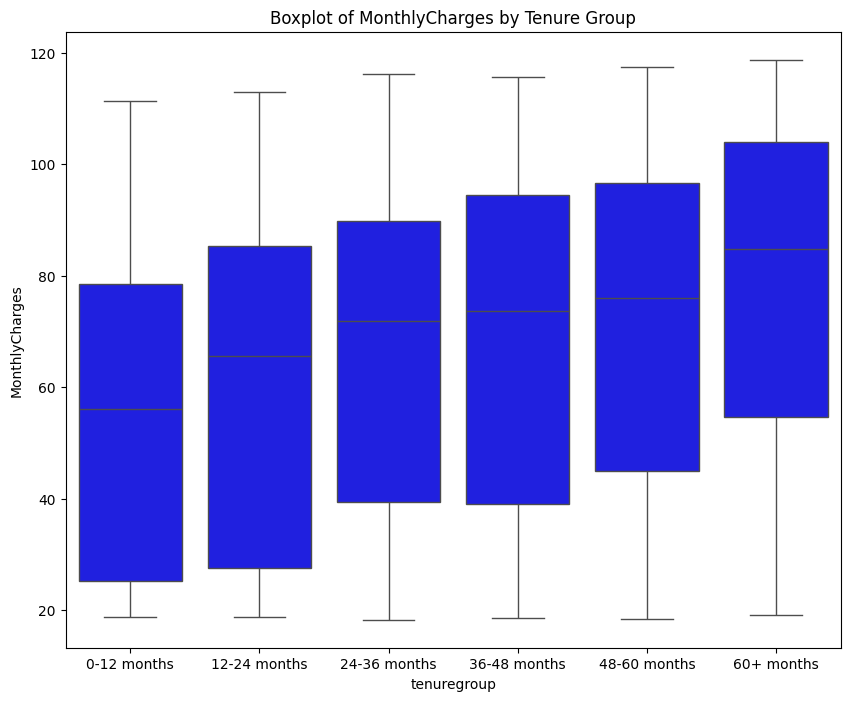

In [9]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='tenuregroup', y='MonthlyCharges', data=data, color='blue')
plt.title("Boxplot of MonthlyCharges by Tenure Group")
plt.show()

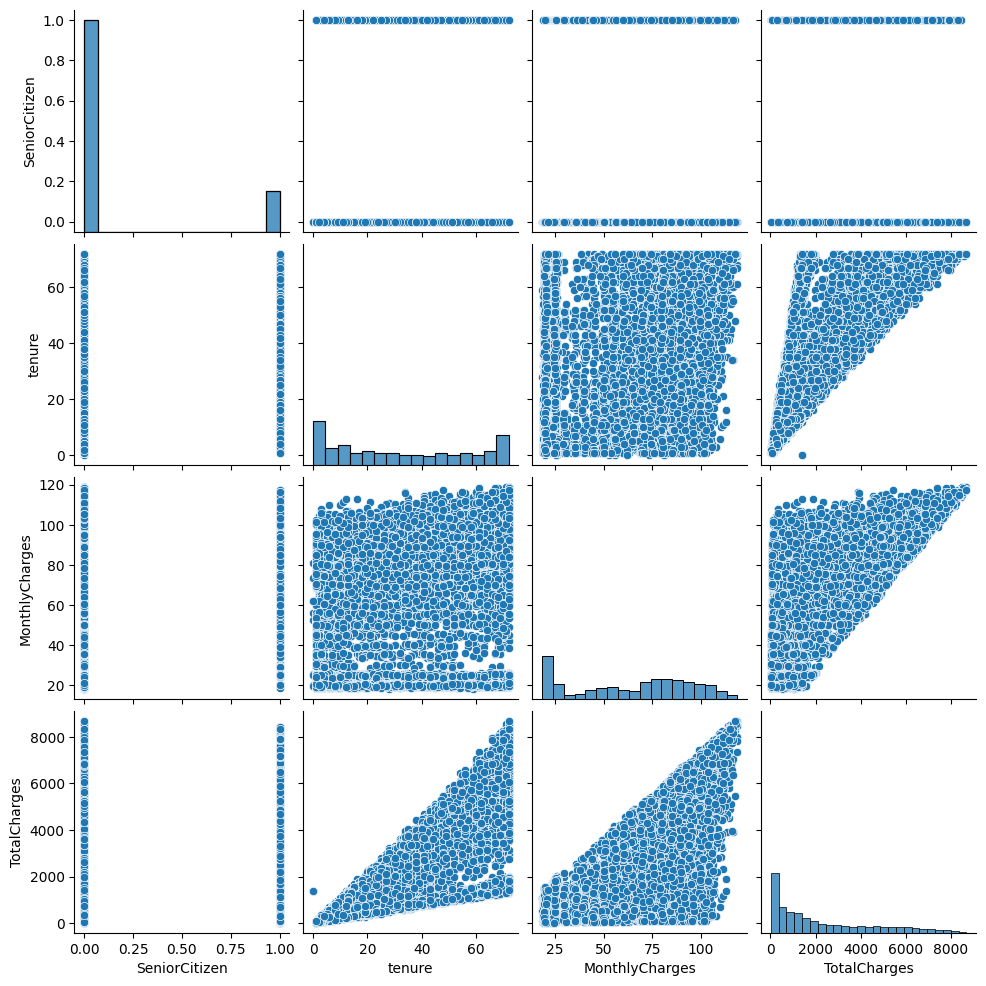

In [10]:
# Visualizations for exploratory data analysis
sns.pairplot(data)
plt.show()

<ipython-input-18-e0d6ac187cf5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PaymentMethod', data=data, palette='viridis')


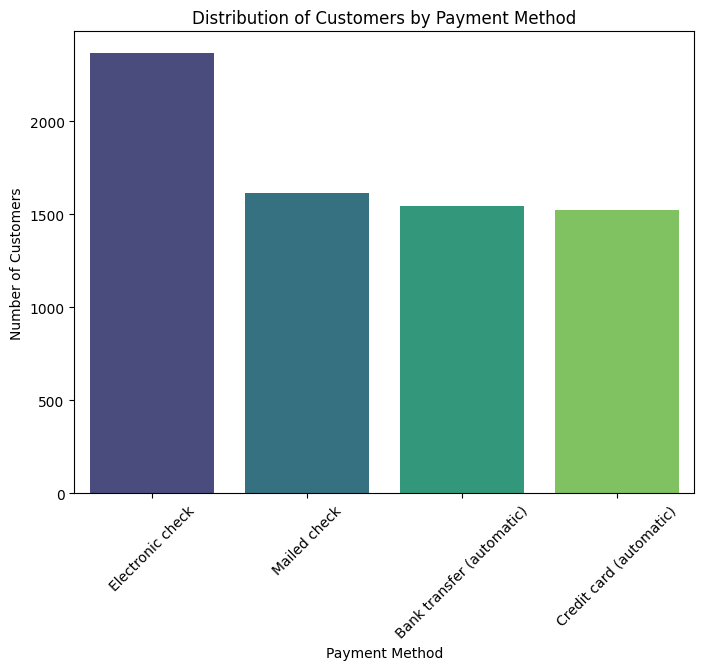

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PaymentMethod', data=data, palette='viridis')
plt.title('Distribution of Customers by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

<ipython-input-11-3ab1a3da19ab>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['tenuregroup'], palette='viridis')


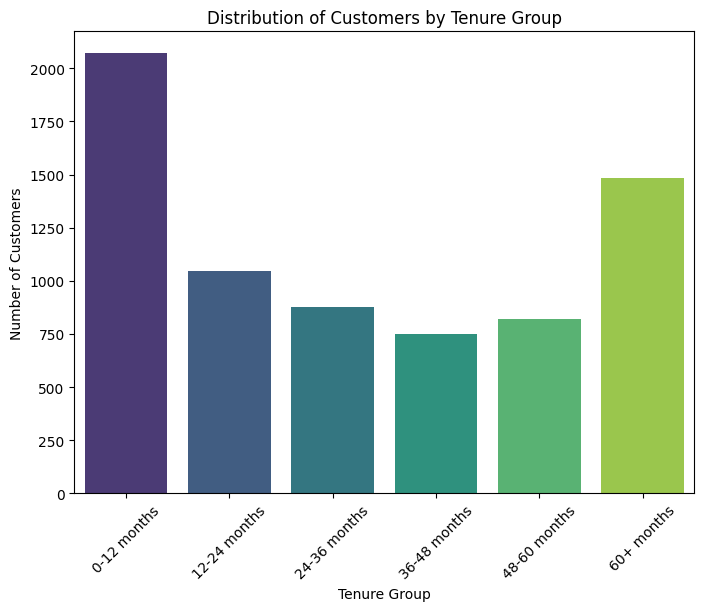

In [11]:
# Count plot to see the distribution of customers across different TenureGroups
plt.figure(figsize=(8, 6))
sns.countplot(x=data['tenuregroup'], palette='viridis')
plt.title('Distribution of Customers by Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

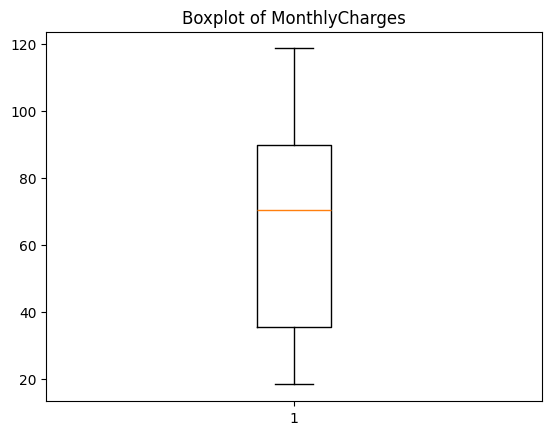

In [12]:
# Additional boxplot for MonthlyCharges
plt.boxplot(data['MonthlyCharges'])
plt.title("Boxplot of MonthlyCharges")
plt.show()

In [13]:
# 9. Normalize or scale the data if necessary
# Normalizing and standardizing relevant features
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()
#features_to_normalize = ['MonthlyCharges']
#features_to_standardize = ['tenure']

In [14]:
data[['MonthlyCharges']] = min_max_scaler.fit_transform(data[['MonthlyCharges']])
data[['tenure']] = standard_scaler.fit_transform(data[['tenure']])

In [15]:
X = data.drop("Churn", axis=1)
y = data["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
print("Training Set Shape:", X_train.shape, y_train.shape)
print("Test Set Shape:", X_test.shape, y_test.shape)

Training Set Shape: (5634, 21) (5634,)
Test Set Shape: (1409, 21) (1409,)


In [17]:
data.to_csv("Cleaned_telecom_customer_churn.csv", index=False)